# Data Analysis for School Performance and Neighborhood Safety

### 1 Import required python packages

In [351]:
#Prepare the plotting tool
%matplotlib inline
import matplotlib.pyplot as plt

#Regression package
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.mixed_linear_model as sm_mlm

#Dataframe support
import pandas as pd

### 2 Load data and overview

In [352]:
# Latitudes and Longitudes of Chicago boundaries for map plots
chicago = pd.read_csv('data/chicago_boundary.csv')

#Import the data that has been prepared
#Only part of column variables are needed
data = pd.read_csv('data/data_table.csv', usecols=[
        'Short_Name', 'Level', 'Safety_Level', 'ACT_Score', 'Graduation_Pct', 'College_Enrollment_Pct',
        'Total_Crimes', 'Total_Thefts', 'Total_Batteries', 'Total_Assaults',
        'Total_Robberies', 'Total_Weapon_Violations', 'Total_Homicides',
        'School_Latitude', 'School_Longitude'])

#Remove outliers with mask
mask = (data['ACT_Score']<25) & (data['Total_Crimes']<8000)
data = data[mask]

#Display of the first 20 records
data.head(20)

,Short_Name,Safety_Level,School_Latitude,School_Longitude,Total_Crimes,Total_Thefts,Total_Batteries,Total_Assaults,Total_Robberies,Total_Weapon_Violations,Total_Homicides,ACT_Score,College_Enrollment_Pct,Graduation_Pct,Level
0,MULTICULTURAL HS,2.0,41.835282,-87.735283,397.0,59.0,89.0,38.0,13.0,6.0,NaN,14.6,41.0,82.0,3.0
2,NOBLE - HANSBERRY HS,2.0,41.734442,-87.650987,1840.0,282.0,390.0,152.0,76.0,63.0,9.0,19.1,NaN,86.2,4.0
3,URBAN PREP - WEST HS,1.0,41.862540,-87.660107,1741.0,455.0,309.0,136.0,64.0,14.0,5.0,16.6,74.6,57.3,2.0
4,AIR FORCE HS,2.0,41.828145,-87.632757,1124.0,220.0,253.0,91.0,63.0,19.0,2.0,18.8,61.5,86.7,3.0
5,PHILLIPS HS,2.0,41.823880,-87.619796,2339.0,595.0,500.0,198.0,114.0,27.0,6.0,15.2,55.4,63.0,2.0
6,HIRSCH HS,3.0,41.753748,-87.601727,3362.0,526.0,872.0,338.0,187.0,73.0,11.0,13.1,40.5,40.0,2.0
7,HARPER HS,1.0,41.775124,-87.669089,2985.0,351.0,700.0,246.0,158.0,108.0,12.0,14.6,31.9,55.9,2.0
8,MAGIC JOHNSON - ROSELAND HS,2.0,41.695160,-87.642697,1129.0,184.0,231.0,87.0,49.0,18.0,2.0,15.0,14.3,NaN,NaN
9,YCCS - YOUTH DEVELOPMENT,2.0,41.751377,-87.641731,2954.0,389.0,805.0,303.0,112.0,97.0,4.0,12.5,14.6,NaN,NaN
10,NOBLE - ROWE CLARK HS,1.0,41.895362,-87.718047,4045.0,473.0,833.0,317.0,221.0,123.0,16.0,18.5,76.9,78.6,3.0


####  2.1 Plot counts of schools for categorial variables

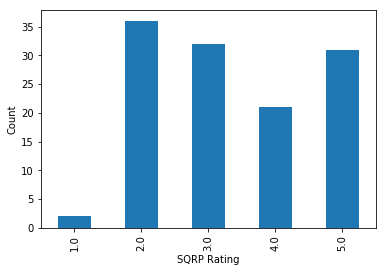

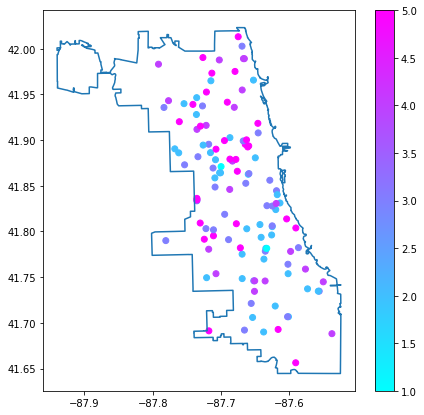

In [353]:
#2.1.1 Counts of schools by SQRP ratings (Level)
ax = data.groupby(['Level']).size().plot(kind='bar')
ax.set(xlabel="SQRP Rating", ylabel="Count")

plt.figure(figsize=(7,7))
plt.plot('Longitude', 'Latitude', data=chicago.loc[0:11350])
plt.scatter(data.School_Longitude, data.School_Latitude, c=data.Level, cmap=plt.cm.get_cmap('cool'))
plt.colorbar()
plt.show()

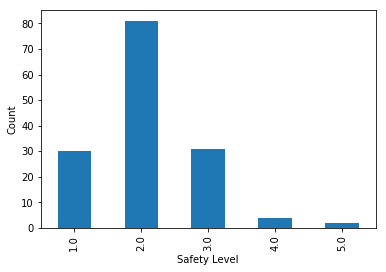

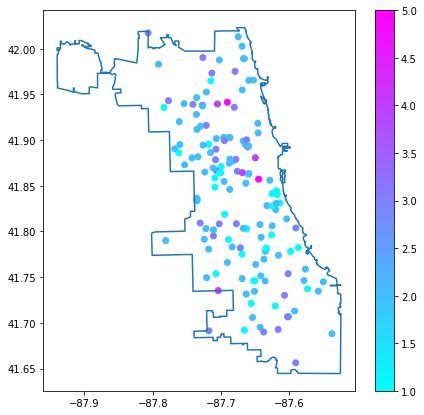

In [354]:
#2.1.2 Counts of schools by survey safety levels
ax = data.groupby(['Safety_Level']).size().plot(kind='bar')
ax.set(xlabel="Safety Level", ylabel="Count")

plt.figure(figsize=(7,7))
plt.plot('Longitude', 'Latitude', data=chicago.loc[0:11350])
plt.scatter(data.School_Longitude, data.School_Latitude, c=data.Safety_Level, cmap=plt.cm.get_cmap('cool'))
plt.colorbar()
plt.show()

#### 2.2 Histograms for interval variables

Plot the counts of schools with different performance variables (ACT scores, Graduation rates and College enrollment percentages). All Y-axis are for the number of schools. Ten bins (default) are used for each plot.

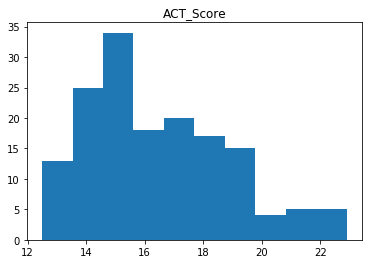

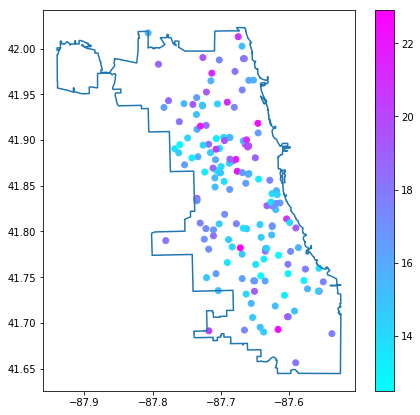

In [355]:
data.hist(column='ACT_Score', grid=False)

plt.figure(figsize=(7,7))
plt.plot('Longitude', 'Latitude', data=chicago.loc[0:11350])
plt.scatter(data.School_Longitude, data.School_Latitude, c=data.ACT_Score, cmap=plt.cm.get_cmap('cool'))
plt.colorbar()
plt.show()


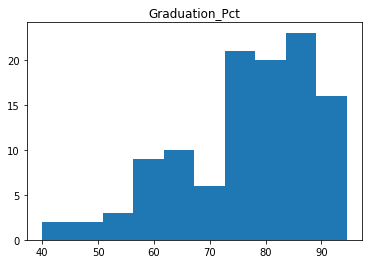

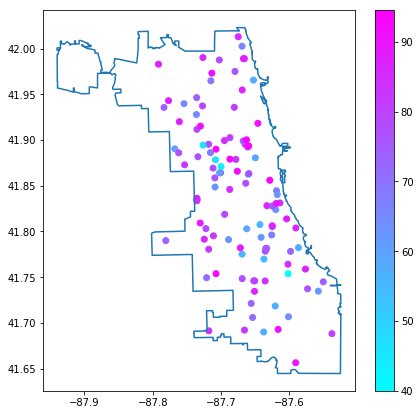

In [356]:
data.hist(column='Graduation_Pct', grid=False)

plt.figure(figsize=(7,7))
plt.plot('Longitude', 'Latitude', data=chicago.loc[0:11350])
plt.scatter(data.School_Longitude, data.School_Latitude, c=data.Graduation_Pct, cmap=plt.cm.get_cmap('cool'))
plt.colorbar()
plt.show()

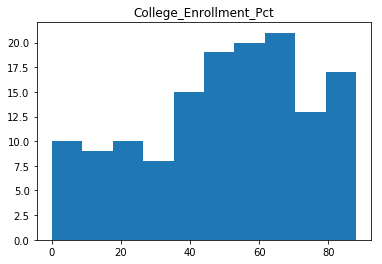

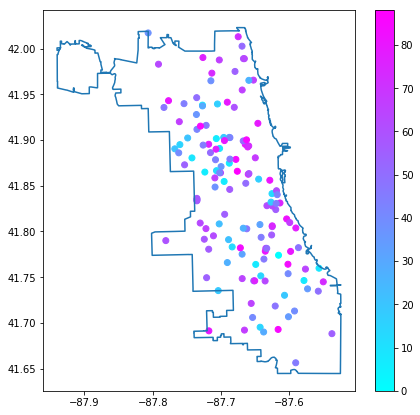

In [357]:
data.hist(column='College_Enrollment_Pct', grid=False)

plt.figure(figsize=(7,7))
plt.plot('Longitude', 'Latitude', data=chicago.loc[0:11350])
plt.scatter(data.School_Longitude, data.School_Latitude, c=data.College_Enrollment_Pct, cmap=plt.cm.get_cmap('cool'))
plt.colorbar()
plt.show()

#### 2.3 Overview of crime data

How many criminal cases are within 0.5km of schools

In [358]:
cases = pd.read_csv('data/school_crimes.csv')
cases['Crime_ID'].nunique()

77863

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1935765198>]], dtype=object)

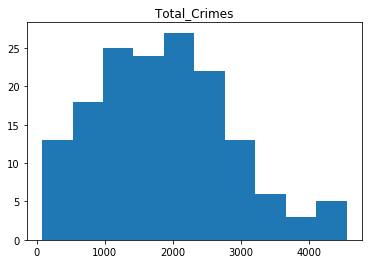

In [359]:
data.hist(column='Total_Crimes', grid=False)

Print the top ten schools with the smallest numbers of criminal cases (safest neighborhood)

In [360]:
data.sort_values(['Total_Crimes'])[['Short_Name','Level','Safety_Level','Total_Crimes']].head(10)

,Short_Name,Level,Safety_Level,Total_Crimes
102,OMBUDSMAN - NORTHWEST HS,NaN,3.0,81.0
56,CHICAGO AGRICULTURE HS,5.0,3.0,154.0
16,CICS - NORTHTOWN HS,5.0,3.0,234.0
49,WASHINGTON HS,4.0,2.0,279.0
74,SOCIAL JUSTICE HS,3.0,2.0,285.0
164,PATHWAYS - ASHBURN HS,NaN,4.0,332.0
125,TAFT HS,4.0,2.0,345.0
120,WORLD LANGUAGE HS,5.0,2.0,345.0
115,YCCS - OLIVE HARVEY,NaN,2.0,350.0
0,MULTICULTURAL HS,3.0,2.0,397.0


Print the top ten schools with the largest numbers of criminal cases (most dangerout neighborhood)

In [361]:
data.sort_values(['Total_Crimes'], ascending=False)[['Short_Name','Level','Safety_Level','Total_Crimes']].head(10)

,Short_Name,Level,Safety_Level,Total_Crimes
108,NOBLE - DRW HS,3.0,2.0,4549.0
112,YCCS - CCA ACADEMY,NaN,2.0,4536.0
42,YCCS - SCHOLASTIC ACHIEVEMENT,NaN,2.0,4444.0
97,MAGIC JOHNSON - N LAWNDALE HS,NaN,3.0,4177.0
104,AUSTIN CCA HS,2.0,1.0,4173.0
10,NOBLE - ROWE CLARK HS,3.0,1.0,4045.0
33,NORTH LAWNDALE - CHRISTIANA HS,2.0,1.0,4009.0
30,LEGAL PREP HS,3.0,2.0,3978.0
155,YCCS - AUSTIN CAREER,NaN,2.0,3630.0
6,HIRSCH HS,2.0,3.0,3362.0


** Visualize locations of schools on Chicago map. Colors represent the number of criminal cases in the neighborhood.**

The safety of school neighborhood displays a clustering pattern.

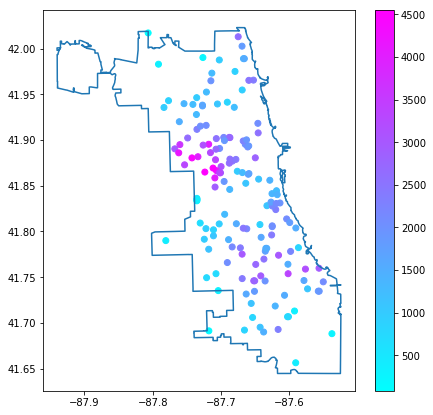

In [362]:
plt.figure(figsize=(7,7))
plt.plot('Longitude', 'Latitude', data=chicago.loc[0:11350])
plt.scatter(data.School_Longitude, data.School_Latitude, c=data.Total_Crimes, cmap=plt.cm.get_cmap('cool'))
plt.colorbar()
plt.show()

### 3 Regression for data correlation analysis

**Target variable (Performance variables):** Rating, ACT Score, Graduation rate, College Enrollment Percentage

**Predictors (Safety variables):** (1) Total crimes (2) Number of different types of crimes

In [363]:
# Define functions for analysis for the rest

# Regression on the total crimes. Scatter and trend line will be plotted. Fitting results will be printed.
def OLS_by_total_crimes(data, target):
    # Try total crimes data
    subdata = data[[target, 'Total_Crimes']].dropna()

    # Plot regression
    sns.regplot(x = subdata['Total_Crimes'], y = subdata[target],
                scatter_kws = {"alpha" : 0.1, "color" : "grey"}, line_kws = {"color" : "blue"});

    # Print regression result
    ols = smf.ols(formula = target + " ~ Total_Crimes", data = subdata)
    model = ols.fit()
    return model

# Regression on different types of crimes. Only fitting results will be shown.
def OLS_by_crime_types(data, target):
    # Try categorized crime data
    subdata = data[[target, 
                    'Total_Thefts', 'Total_Batteries', 'Total_Assaults',
                    'Total_Robberies', 'Total_Weapon_Violations', 'Total_Homicides']].dropna()
    
    ols = smf.ols(formula = target + "~ Total_Thefts + Total_Batteries + Total_Assaults + Total_Robberies + Total_Weapon_Violations + Total_Homicides", data = subdata)
    model = ols.fit()
    return model
    

#### 3.1 Scatter matrix analysis using total crimes and performance variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1937554e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1934d01128>]], dtype=object)

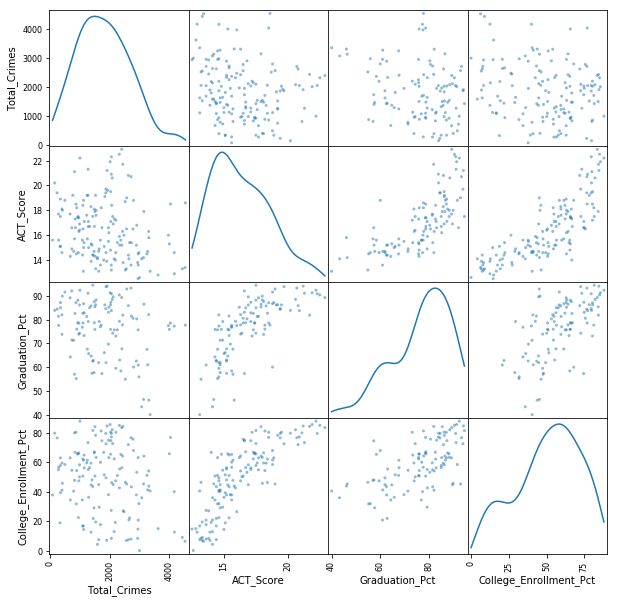

In [364]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Total_Crimes','ACT_Score','Graduation_Pct','College_Enrollment_Pct']], alpha=0.5, figsize=(10, 10), diagonal='kde')

#### 3.2 Scatter plots of survey safety levels on different crimes

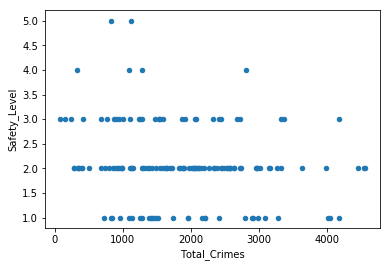

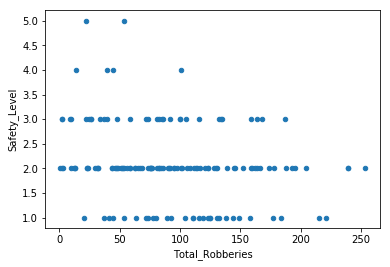

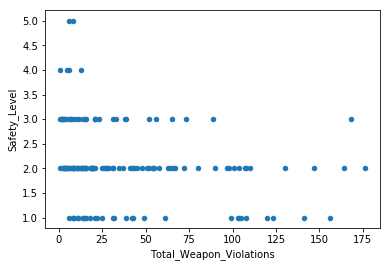

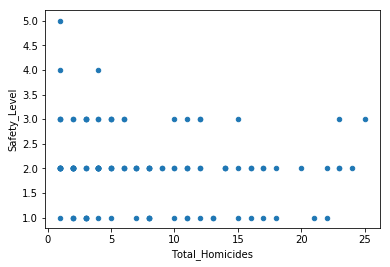

In [365]:
data.plot(kind='scatter', x='Total_Crimes', y='Safety_Level')
data.plot(kind='scatter', x='Total_Robberies', y='Safety_Level')
data.plot(kind='scatter', x='Total_Weapon_Violations', y='Safety_Level')
data.plot(kind='scatter', x='Total_Homicides', y='Safety_Level')

### 3.3 Regression on total crimes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Level   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     9.799
Date:                Fri, 01 Dec 2017   Prob (F-statistic):            0.00219
Time:                        00:14:36   Log-Likelihood:                -189.92
No. Observations:                 122   AIC:                             383.8
Df Residuals:                     120   BIC:                             389.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9778      0.226     17.633      0.000       3.531       4.424
Total_Crimes    -0.0003      0.000     -3.130      0.002      -0.001      -0.000
==============================================================================
Omnibus:                       47.490   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.798
Skew:                           0.136   Prob(JB):                       0.0203
Kurtosis:                       1.791   Cond. No.                     4.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

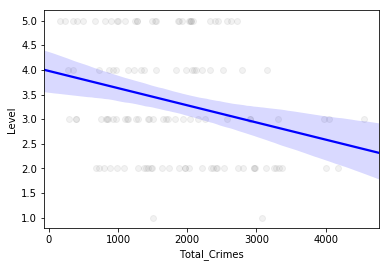

In [366]:
#3.3.1 Target variable: Rating (Level)
OLS_by_total_crimes(data, 'Level').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Safety_Level   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     5.636
Date:                Fri, 01 Dec 2017   Prob (F-statistic):             0.0189
Time:                        00:14:37   Log-Likelihood:                -173.20
No. Observations:                 148   AIC:                             350.4
Df Residuals:                     146   BIC:                             356.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3852      0.136     17.553      0.000       2.117       2.654
Total_Crimes    -0.0002   6.45e-05     -2.374      0.019      -0.000   -2.57e-05
==============================================================================
Omnibus:                       16.538   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.250
Skew:                           0.701   Prob(JB):                     4.01e-05
Kurtosis:                       4.148   Cond. No.                     4.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

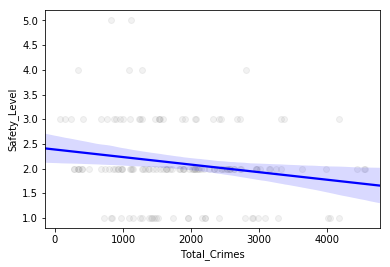

In [367]:
#3.3.2 Target variable: Survey safety level
OLS_by_total_crimes(data, 'Safety_Level').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ACT_Score   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     8.023
Date:                Fri, 01 Dec 2017   Prob (F-statistic):            0.00524
Time:                        00:14:37   Log-Likelihood:                -354.04
No. Observations:                 156   AIC:                             712.1
Df Residuals:                     154   BIC:                             718.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.4805      0.405     43.140      0.000      16.680      18.281
Total_Crimes    -0.0005      0.000     -2.832      0.005      -0.001      -0.000
==============================================================================
Omnibus:                       13.290   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.901
Skew:                           0.757   Prob(JB):                     0.000581
Kurtosis:                       2.957   Cond. No.                     4.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

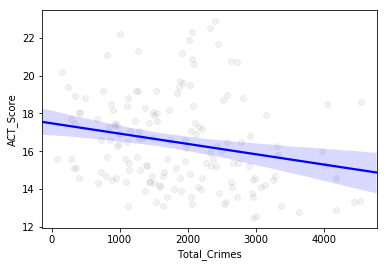

In [368]:
#3.3.3 Target variable: ACT score
OLS_by_total_crimes(data, 'ACT_Score').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Graduation_Pct   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     8.167
Date:                Fri, 01 Dec 2017   Prob (F-statistic):            0.00510
Time:                        00:14:38   Log-Likelihood:                -435.64
No. Observations:                 112   AIC:                             875.3
Df Residuals:                     110   BIC:                             880.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       82.6642      2.413     34.257      0.000      77.882      87.446
Total_Crimes    -0.0034      0.001     -2.858      0.005      -0.006      -0.001
==============================================================================
Omnibus:                        7.783   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.963
Skew:                          -0.617   Prob(JB):                       0.0187
Kurtosis:                       2.572   Cond. No.                     4.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

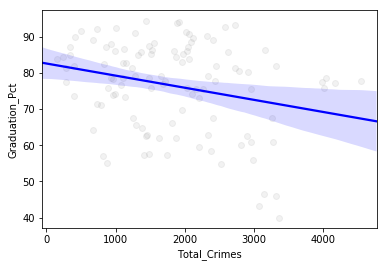

In [369]:
#3.3.4 Target variable: Graduation rate
OLS_by_total_crimes(data, 'Graduation_Pct').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     College_Enrollment_Pct   R-squared:                       0.043
Model:                                OLS   Adj. R-squared:                  0.036
Method:                     Least Squares   F-statistic:                     6.216
Date:                    Fri, 01 Dec 2017   Prob (F-statistic):             0.0138
Time:                            00:14:38   Log-Likelihood:                -644.82
No. Observations:                     142   AIC:                             1294.
Df Residuals:                         140   BIC:                             1300.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       58.7437      4.160     14.120      0.000      50.519      66.969
Total_Crimes    -0.0049      0.002     -2.493      0.014      -0.009      -0.001
==============================================================================
Omnibus:                       16.648   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.239
Skew:                          -0.232   Prob(JB):                       0.0442
Kurtosis:                       2.084   Cond. No.                     4.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

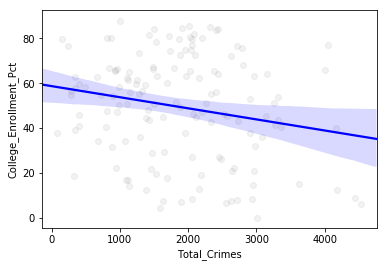

In [370]:
#3.3.5 Target variable: College enrollment percentage
OLS_by_total_crimes(data, 'College_Enrollment_Pct').summary()

#### 3.4 Multivariable regressions on different variables

In [371]:
#3.4.1 Target variable: Rating (Level)
OLS_by_crime_types(data, 'Level').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Level   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2.726
Date:                Fri, 01 Dec 2017   Prob (F-statistic):             0.0175
Time:                        00:14:39   Log-Likelihood:                -152.80
No. Observations:                 100   AIC:                             319.6
Df Residuals:                      93   BIC:                             337.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.7039      0.335     11.043      0.000       3.038       4.370
Total_Thefts             5.327e-05      0.001      0.084      0.934      -0.001       0.001
Total_Batteries            -0.0040      0.003     -1.567      0.120      -0.009       0.001
Total_Assaults              0.0044      0.006      0.685      0.495      -0.008       0.017
Total_Robberies             0.0057      0.005      1.228      0.222      -0.003       0.015
Total_Weapon_Violations     0.0005      0.008      0.062      0.951      -0.016       0.017
Total_Homicides            -0.0165      0.038     -0.432      0.666      -0.092       0.059
==============================================================================
Omnibus:                       16.507   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.600
Skew:                           0.083   Prob(JB):                        0.100
Kurtosis:                       1.962   Cond. No.                     1.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [372]:
#3.4.2 Target variable: ACT Score
OLS_by_crime_types(data, 'ACT_Score').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ACT_Score   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     4.096
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           0.000875
Time:                        00:14:39   Log-Likelihood:                -287.35
No. Observations:                 131   AIC:                             588.7
Df Residuals:                     124   BIC:                             608.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  16.3955      0.578     28.347      0.000      15.251      17.540
Total_Thefts                0.0021      0.001      1.862      0.065      -0.000       0.004
Total_Batteries            -0.0098      0.004     -2.216      0.029      -0.019      -0.001
Total_Assaults              0.0178      0.011      1.603      0.112      -0.004       0.040
Total_Robberies             0.0012      0.008      0.160      0.873      -0.014       0.017
Total_Weapon_Violations     0.0024      0.013      0.175      0.861      -0.024       0.029
Total_Homicides             0.0036      0.065      0.056      0.956      -0.125       0.132
==============================================================================
Omnibus:                       11.826   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.613
Skew:                           0.753   Prob(JB):                      0.00182
Kurtosis:                       3.204   Cond. No.                     2.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
#3.4.3 Target variable: Graduation rate
OLS_by_crime_types(data, 'Graduation_Pct').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Graduation_Pct   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2.749
Date:                Fri, 01 Dec 2017   Prob (F-statistic):             0.0172
Time:                        00:14:39   Log-Likelihood:                -356.51
No. Observations:                  92   AIC:                             727.0
Df Residuals:                      85   BIC:                             744.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  82.9635      3.652     22.714      0.000      75.701      90.226
Total_Thefts                0.0019      0.008      0.245      0.807      -0.013       0.017
Total_Batteries            -0.0289      0.028     -1.041      0.301      -0.084       0.026
Total_Assaults             -0.0025      0.068     -0.036      0.971      -0.139       0.134
Total_Robberies             0.0484      0.053      0.913      0.364      -0.057       0.154
Total_Weapon_Violations     0.1191      0.090      1.321      0.190      -0.060       0.298
Total_Homicides            -0.7393      0.424     -1.746      0.085      -1.581       0.103
==============================================================================
Omnibus:                        5.687   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.167
Skew:                          -0.506   Prob(JB):                       0.0755
Kurtosis:                       2.433   Cond. No.                     1.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [374]:
#3.4.4 Target variable: College enrollment percentage
OLS_by_crime_types(data, 'College_Enrollment_Pct').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     College_Enrollment_Pct   R-squared:                       0.169
Model:                                OLS   Adj. R-squared:                  0.124
Method:                     Least Squares   F-statistic:                     3.750
Date:                    Fri, 01 Dec 2017   Prob (F-statistic):            0.00195
Time:                            00:14:39   Log-Likelihood:                -531.16
No. Observations:                     118   AIC:                             1076.
Df Residuals:                         111   BIC:                             1096.
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  49.7486      6.235      7.978      0.000      37.393      62.104
Total_Thefts                0.0277      0.013      2.093      0.039       0.001       0.054
Total_Batteries            -0.1129      0.046     -2.478      0.015      -0.203      -0.023
Total_Assaults              0.2278      0.115      1.987      0.049       0.001       0.455
Total_Robberies            -0.0710      0.088     -0.809      0.420      -0.245       0.103
Total_Weapon_Violations     0.1251      0.140      0.894      0.373      -0.152       0.402
Total_Homicides             0.0288      0.695      0.041      0.967      -1.348       1.406
==============================================================================
Omnibus:                        9.860   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                4.339
Skew:                          -0.201   Prob(JB):                        0.114
Kurtosis:                       2.151   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""